<b>CREDIT CARD ANOMALY DETECTION</b><br>
--
AUTHOR : sammyon7

In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

<b>DATASET BY : https://www.kaggle.com/joelmosiori/creditcardfraud </b>

In [4]:
data = pd.read_csv('../input/creditcardfraud/creditcard.csv',sep=',')
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [6]:
data.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

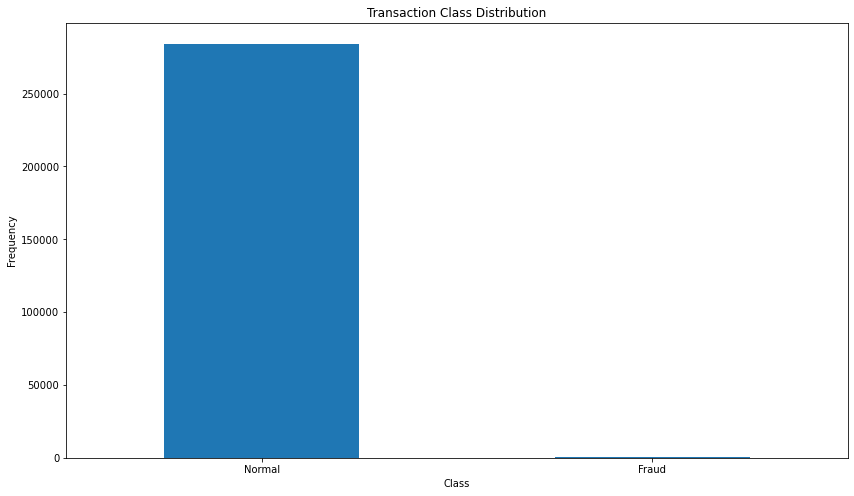

In [15]:
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)
plt.xlabel("Class")

plt.ylabel("Frequency")

In [16]:
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

fraud.shape,normal.shape

((492, 31), (284315, 31))

In [17]:
print(fraud.Amount.describe())

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [18]:
print(normal.Amount.describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


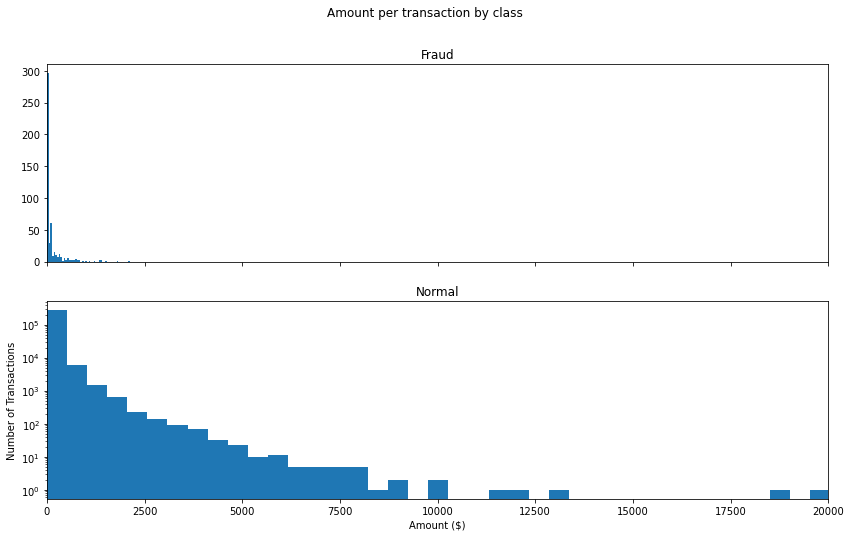

In [19]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

fraudulent amount summary statistics


{'whiskers': [<matplotlib.lines.Line2D at 0x7f1bd739db50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1bd73a4310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1bd7397ad0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1bd73ac550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1bd73ac610>],
 'means': []}

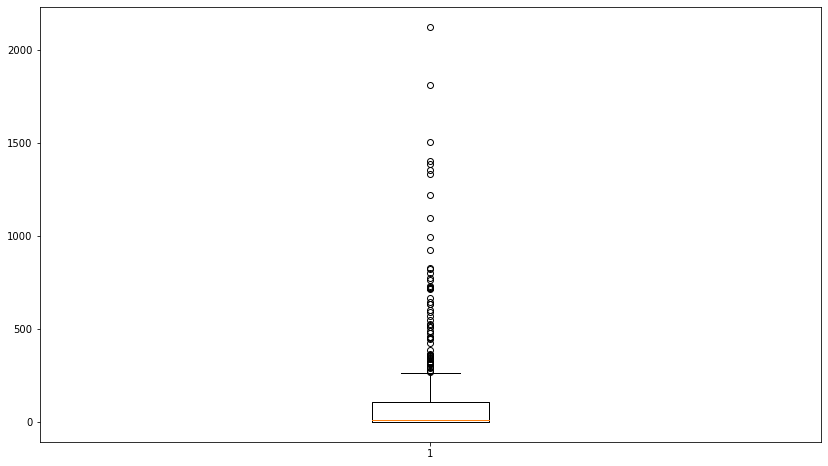

In [20]:
print('fraudulent amount summary statistics')
fraud.Amount.describe()
plt.boxplot(fraud.Amount)

non-fraud amount summary statistics


{'whiskers': [<matplotlib.lines.Line2D at 0x7f1bd79dfe10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1bd79df4d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1bd77b6550>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1bd79d5c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1bd79d5290>],
 'means': []}

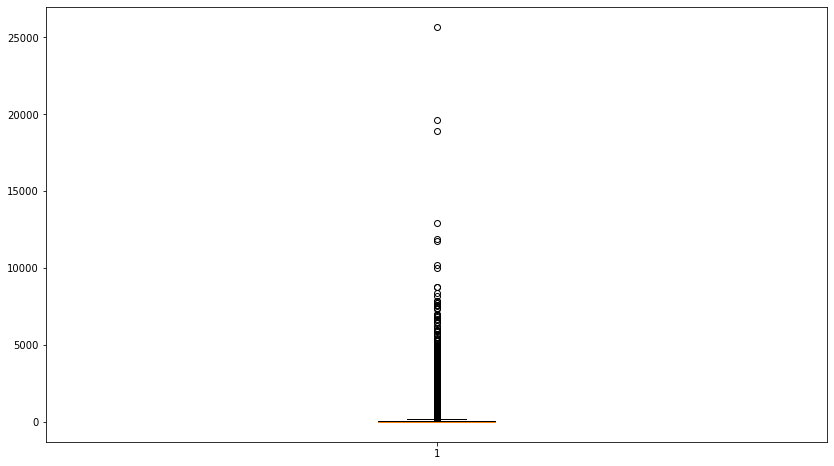

In [21]:
print('non-fraud amount summary statistics')
normal.Amount.describe()
plt.boxplot(normal.Amount)

In [25]:
data1= data.sample(frac = 0.1,random_state=1)
data1.shape

(28481, 31)

In [26]:
Fraud = data1[data1['Class']==1]
Valid = data1[data1['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))

print(outlier_fraction)
print("Fraud Cases : {}".format(len(Fraud)))
print("Normal Cases : {}".format(len(Valid)))

0.0017234102419808666
Fraud Cases : 49
Normal Cases : 28432


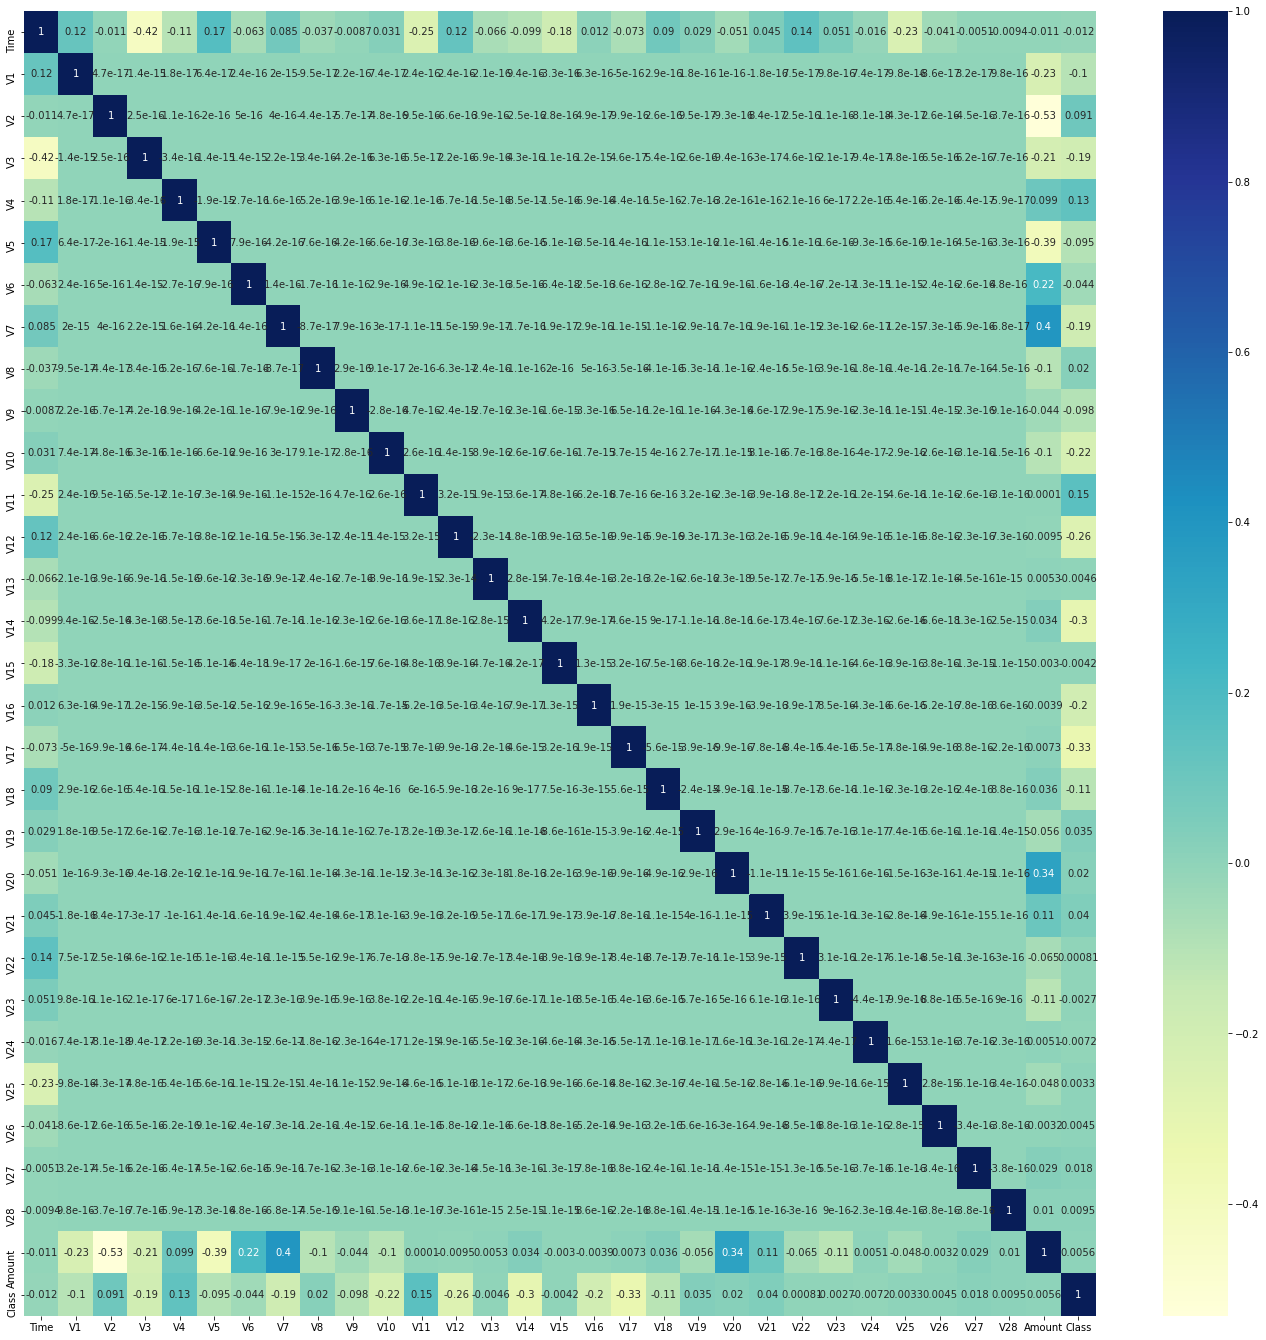

In [27]:
import seaborn as sns

corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(24,24))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="YlGnBu")

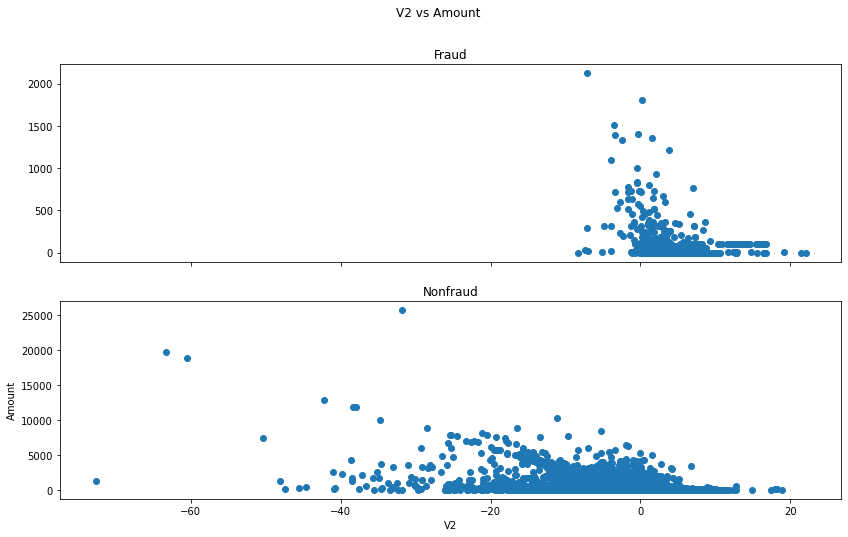

None


In [28]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('V2 vs Amount')
ax1.scatter(fraud.V2, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.V2, normal.Amount)
ax2.set_title('Nonfraud')
plt.xlabel('V2')
plt.ylabel('Amount')
print(plt.show())

AxesSubplot(0.125,0.125;0.775x0.755)


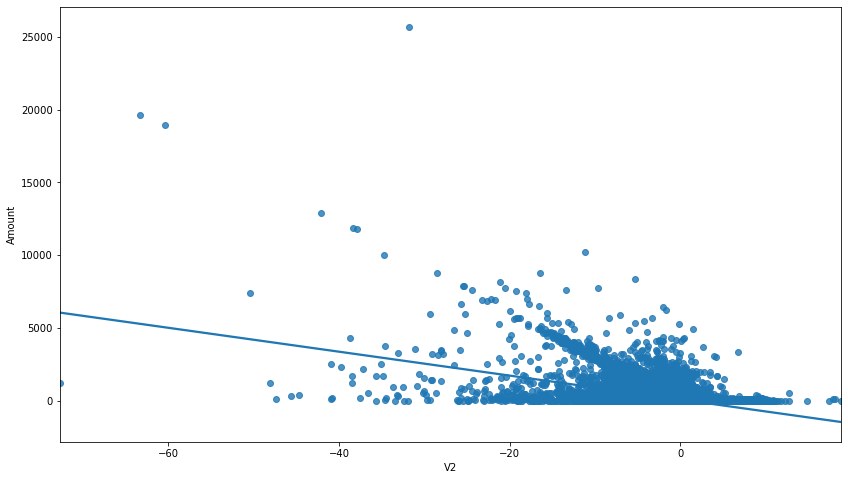

In [30]:
print(sns.regplot(x='V2',
           y='Amount',
           ci=None,
           data=normal))

AxesSubplot(0.125,0.125;0.775x0.755)


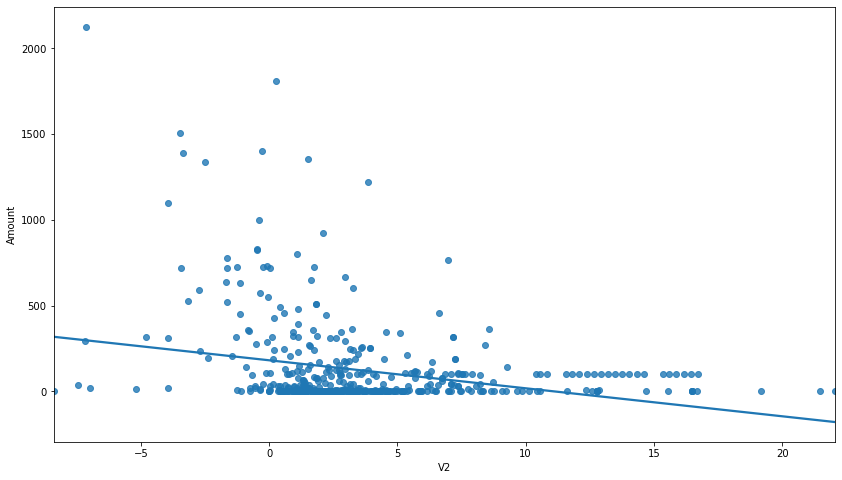

In [31]:
print(sns.regplot(x='V2',
           y='Amount',
           ci=None,
           data=fraud))

In [37]:
columns = data1.columns.tolist() 
columns = [c for c in columns if c not in ["Class"]] 
target = "Class"
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))

In [38]:
X.shape

(28481, 30)

In [39]:
Y.shape

(28481,)

In [40]:
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X),contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto',leaf_size=30, metric='minkowski', p=2, metric_params=None, contamination=outlier_fraction)
}

Isolation Forest: 73
Accuracy Score :
0.9974368877497279
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.26      0.27      0.26        49

    accuracy                           1.00     28481
   macro avg       0.63      0.63      0.63     28481
weighted avg       1.00      1.00      1.00     28481



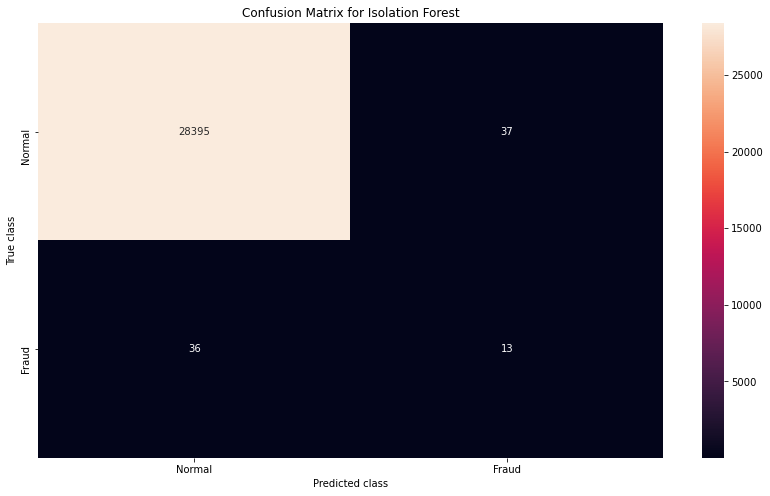

Local Outlier Factor: 97
Accuracy Score :
0.9965942207085425
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481



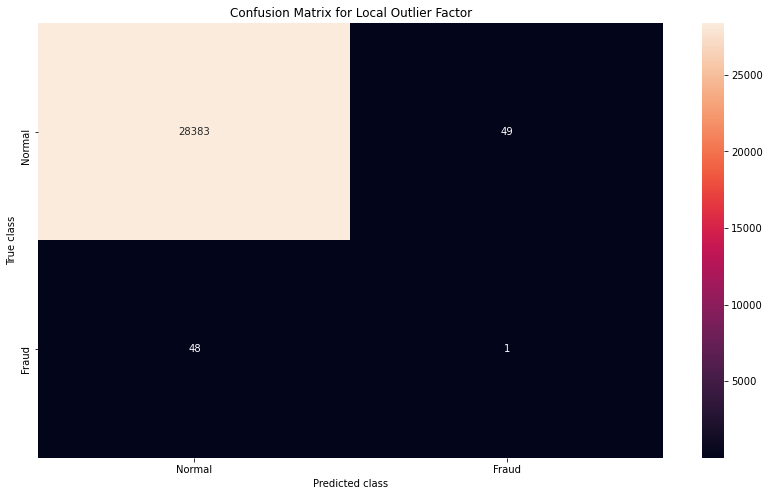

In [41]:
from sklearn.metrics import confusion_matrix
n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #1
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Isolation Forest":
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    else:    
       print ('No other model')
    
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))
    conf_matrix = confusion_matrix(Y, y_pred)
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d');
    plt.title('Confusion Matrix for ' + clf_name)
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

In the future, isolation forest can be used in scenarios whereby the datasets provided do not provide sufficient fraud examples thus require use of a consistent aproach to make the available examples suffice.

<i>Thank you!</i>